# Demo_Projects_CNN_digits_recognition_Benbhk

This project is a demonstration. It uses a convolutional neural network (CNN) to predict a number.

In this project, will use the The MNIST database (Modified National Institute of Standards and Technology database), is a large database of handwritten digits.

## Import

In [ ]:
# importation of the datasets from tensorflow
from tensorflow.keras import datasets

# conventional imports
import matplotlib.pyplot as plt
import random
import pickle as pkl
import numpy as np

2022-04-21 16:25:17.205041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-21 16:25:17.205161: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Loading the MNIST database

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

## Display of some exemple

<Figure size 432x288 with 0 Axes>

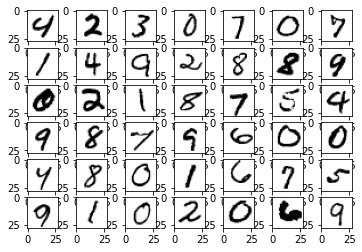

In [ ]:
plt.figure()

rows = 6
columns = 7

f, axarr = plt.subplots(rows,columns) 

for i in range(rows):
    for j in range(columns):
        rand = random.randint(0, X_train.shape[0])
        axarr[i,j].imshow(X_train[rand],cmap='gray_r')

## Preprocessing

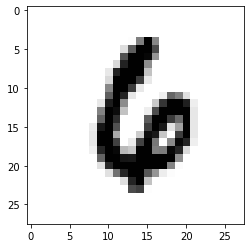

In [6]:
plt.imshow(X_train[39],cmap='gray_r')

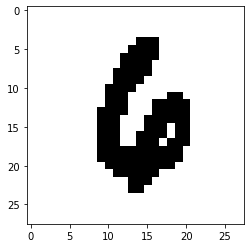

In [ ]:

import numpy as np

def fun(e):
    if e > 50:
        return 255
    return 0

vfunc = np.vectorize(fun)

plt.imshow(vfunc(X_train[39]),cmap='gray_r')

In [ ]:
for i in range(0,len(X_train)):
    X_train[i] = vfunc(X_train[i])
    print(f'{round(i*100/len(X_train),1)} %', end = '\r')
    
for i in range(0,len(X_test)):
    X_test[i] = vfunc(X_test[i])
    print(f'{round(i*100/len(X_test),1)} %', end = '\r')

<Figure size 432x288 with 0 Axes>

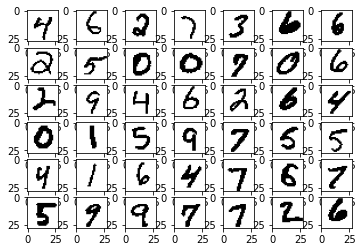

In [ ]:
plt.figure()

rows = 6
columns = 7

f, axarr = plt.subplots(rows,columns) 

for i in range(rows):
    for j in range(columns):
        rand = random.randint(0, X_train.shape[0])
        axarr[i,j].imshow(X_train[rand],cmap='gray_r')

### Normalization (0_255 -> -0.5_0.5)

In [ ]:
def img_normalizer(X):
    return X/255-0.5
    
X_train_normlz = img_normalizer(X_train)
X_test_normlz = img_normalizer(X_test)

#### Note : this normalisation keep the quality of the image.

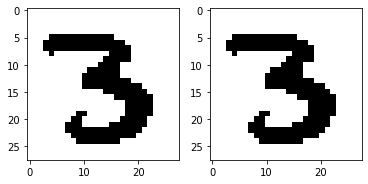

In [ ]:
f, axarr = plt.subplots(1,2) 


axarr[0].imshow(X_train[12],cmap='gray_r')
axarr[1].imshow(X_train_normlz[12],cmap='gray_r')

### Inputs the RGB dimensionality in X_train and X_test

In [ ]:
from tensorflow.keras.backend import expand_dims

X_train_normlz = expand_dims(X_train_normlz,axis=-1)
X_test_normlz = expand_dims(X_test_normlz,axis=-1)

In [ ]:
X_test_normlz[1].shape

TensorShape([28, 28, 1, 1])

### Categorize the y_train and y_test

In [27]:
y_test[7]

9

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [29]:
y_test_cat[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Model construction

### Building the CNN Architecture

In [17]:
from tensorflow.keras import layers, Sequential, models


def initialize_model():
    
    model = Sequential()
    
    ### First convolution & max-pooling
    model.add(layers.Conv2D(8, (4,4), strides=(1,1), input_shape=(28, 28, 1), activation="relu", padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    ### Second convolution & max-pooling
    model.add(layers.Conv2D(16, (3,3), strides=(1,1), activation="relu", padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One fully connected
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer (let's say a classification with 10 output)
    model.add(layers.Dense(10, activation='softmax')) 
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Training

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=20, restore_best_weights=True)

model = initialize_model()

history = model.fit(X_train_normlz, y_train_cat,  
                    validation_split=0.3,
                    epochs=10, 
                    batch_size=4, 
                    verbose=1, 
                    callbacks=[es])

Epoch 1/10
10500/10500 [==============================] - 158s 15ms/step - loss: 0.3056 - accuracy: 0.9023 - val_loss: 0.1464 - val_accuracy: 0.9578
Epoch 2/10
10500/10500 [==============================] - 212s 20ms/step - loss: 0.1089 - accuracy: 0.9667 - val_loss: 0.1083 - val_accuracy: 0.9685
Epoch 3/10
10500/10500 [==============================] - 191s 18ms/step - loss: 0.0844 - accuracy: 0.9738 - val_loss: 0.0996 - val_accuracy: 0.9705
Epoch 4/10
10500/10500 [==============================] - 125s 12ms/step - loss: 0.0708 - accuracy: 0.9780 - val_loss: 0.0834 - val_accuracy: 0.9743
Epoch 5/10
10500/10500 [==============================] - 115s 11ms/step - loss: 0.0635 - accuracy: 0.9802 - val_loss: 0.0785 - val_accuracy: 0.9763
Epoch 6/10
10500/10500 [==============================] - 104s 10ms/step - loss: 0.0568 - accuracy: 0.9825 - val_loss: 0.0886 - val_accuracy: 0.9747
Epoch 7/10
10500/10500 [==============================] - 105s 10ms/step - loss: 0.0528 - accuracy: 0.9835

In [20]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,0.3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0.9,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

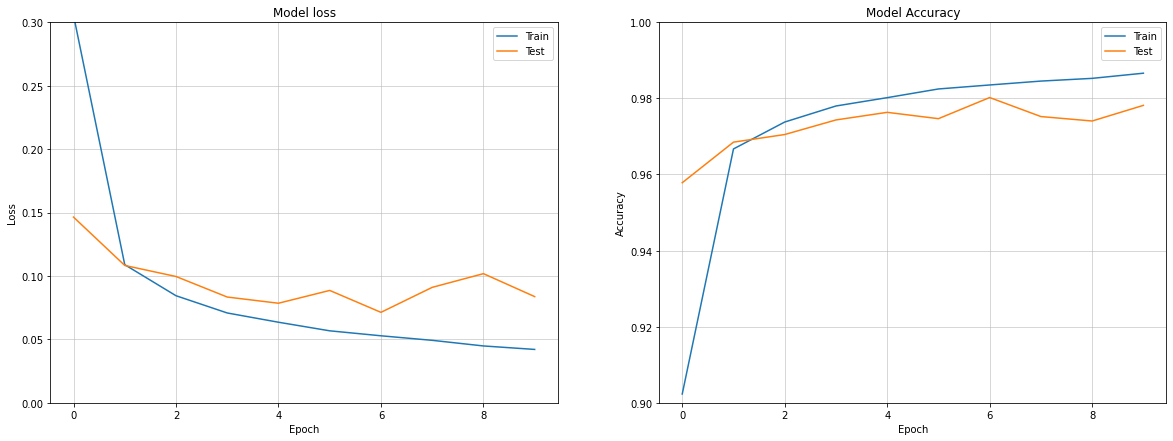

In [21]:
plot_loss_accuracy(history)

### Evalation

In [22]:
model.evaluate(X_test_normlz,y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0674 - accuracy: 0.9815


[0.06740715354681015, 0.9815000295639038]

98 % accurate on the test set

## Saving the model

In [23]:
pkl.dump(model, open('../Demo_Project_CNN_numbers_recognition_Benbhk/Models/numbers_recognition_model_V1.2', 'wb'))

2022-04-19 22:24:22.988982: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://2de3bf56-5dda-472d-b143-776e3526d937/assets
